# Exemplary output dictionary for *TGGLinesPlus* algorithm proposed and developed by [the GeoAIR Lab](https://geoair.lipingyang.org/)

For simplicity, we use the simple and straightforward two MNIST examples we used in our *TGGLinesPlus* paper (i.e., the Figure 2 and Figure 3 in the paper) to **demonstrate the output dictionary of our TGGLinesPlus**.

We also provide the **code snippets for how to save output result as a pickle (.pkl)file** and for **how to load in the .pkl file for later analysis** instead of needing to run the result each time we need them.


- This Jupyter Notebook was prepared by the GeoAIR Lab director [Dr. Liping Yang](https://lipingyang.org/) (the first and corresponding author of the *TGGLinesPlus* paper). All the rest of the three Jupyter Notebooks in this *TGGLinesPlus* GitHub repository were prepared by Joshua Driscol (the 2nd author of the paper) with Dr. Yang's suggestions and guidance. 

- The *TGGLinesPlus* algorithm was designed and developed by Dr. Liping Yang and her master student Joshua Driscol, and the TGGLinesPlus algorithm was implemented by Joshua Driscol with Dr. Yang's very close supervision and guidance.

- Benchmark of the six methods in the TGGLLinesPlus paper.

    - Ming Gong (the third author of the paper) worked on the benchmark of TGGLines and Linelet.
    - Joshua Driscol worked on the benchmark of all the other four methods except for the two done by Ming.

- Quantitative evaluation

    - Ming (the third author of the paper) contributed significantly tothe revised version of the TGGLinesPlus paper for quantitative evaluation by working with Dr. Liping Yang very closely.

- The Jupyter Notebook was proofread by the GeoAIR lab member Katie Slack (the forth author of the revised version of the TGGLinesPlus), who also contributed significantly in the revised version of the manuscript for the following: (1) annotated all ground truth data with Dr. Liping Yang's supervision, (2) wrote up and edited partial text about the sections of quantitative evaluation, strengths, and potential applications, and (3) proof read and provided suggestions about the whole revised manuscript.

- All other co-authors contributed to helpful discussion and edits of the original manuscript and/or the revised manuscript.



## Reading in needed libraries and our own TGGLinesPlus functions 

In [20]:
import csv
import itertools
import time
import timeit

import numpy as np

from skimage.filters import threshold_mean
from skimage.morphology import skeletonize
from skimage import graph as skgraph

import networkx as nx

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline

from utils.plotting import *
from utils.process import *


## Read in MNIST data

In [21]:
mnist_filename = '../data/mnist/mnist_test.csv'
mnist_images, mnist_labels = read_in_mnist(mnist_filename)
mnist_binaries = [create_binary(image) for image in mnist_images]
mnist_skeletons = [create_skeleton(binary) for binary in mnist_binaries]


## TGGLinesPlus algorithm illustrration example in the paper (Figure 2): a graph with one loop and one subgraph

In [22]:

idx_2254 = 2254  # this is the paper TGGLinePlus algorithm illustration figure image (Figure 2 in the TGGLinesPlus paper)
label_2254 = mnist_labels[idx_2254]
img_2254 = mnist_images[idx_2254]
binary_2254 = mnist_binaries[idx_2254]
skeleton_2254 = mnist_skeletons[idx_2254]


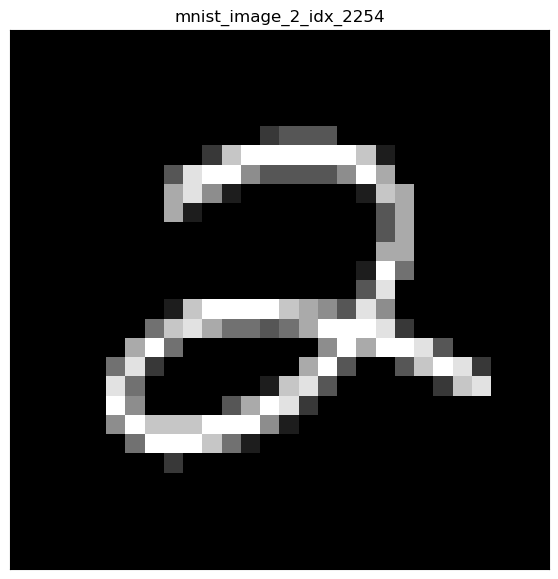

In [23]:
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.imshow(img_2254, cmap="gray")

ax.set_xticks([])
ax.set_yticks([]) 
ax.set_title("mnist_image_{}_idx_{}".format(label_2254, idx_2254))

plt.show()

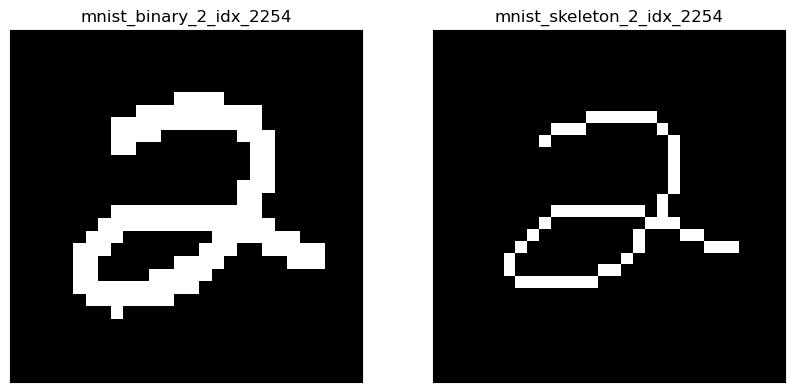

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

ax[0].imshow(binary_2254, cmap="gray")
ax[1].imshow(skeleton_2254, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0].set_title("mnist_binary_{}_idx_{}".format(label_2254, idx_2254))
ax[1].set_title("mnist_skeleton_{}_idx_{}".format(label_2254, idx_2254))

plt.show()


In [25]:
skeleton_array_2254, coordinates_2254 = create_skeleton_graph(skeleton_2254, connectivity=2)
skeleton_graph_2254 = nx.from_scipy_sparse_array(skeleton_array_2254)
search_by_node_2254, search_by_location_2254 = get_node_locations(coordinates_2254)


In [30]:
result_dict_2254 = TGGLinesPlus(skeleton_2254)
stats_dict_2254 = print_stats(result_dict_2254)


Number of junctions:                       2
Number of terminal nodes:                  2
Number of path segmentation points:        4
Number of nodes in graph:                  51
Path seg points as total node percent:     0.078
------------------------------------------
Number of subgraphs in main graph:         1
------------------------------------------
Number of pixels in image:                 900
Skeleton pixels as total image percent:    0.057
------------------------------------------
Time to run:                               0.00389s



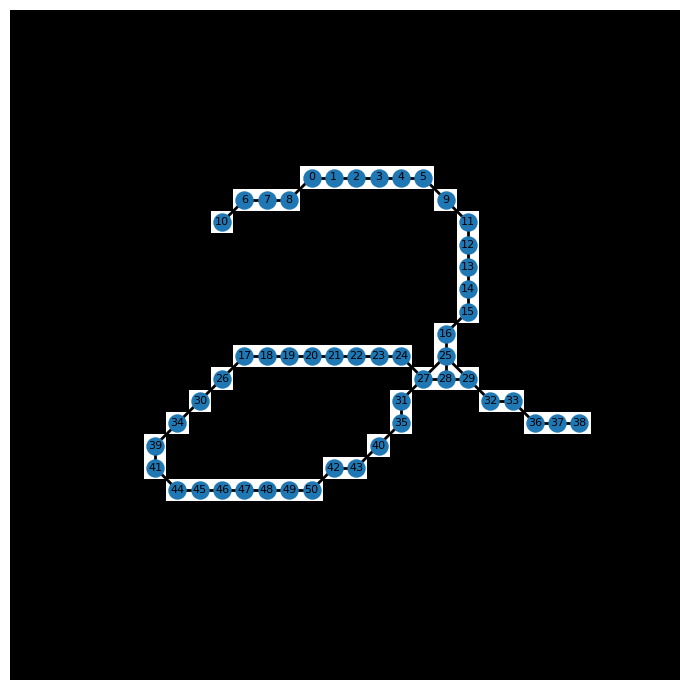

In [31]:
plot_graph(skeleton_2254, skeleton_graph_2254, coordinates_2254, search_by_node_2254, node_size=150, label_size=8)


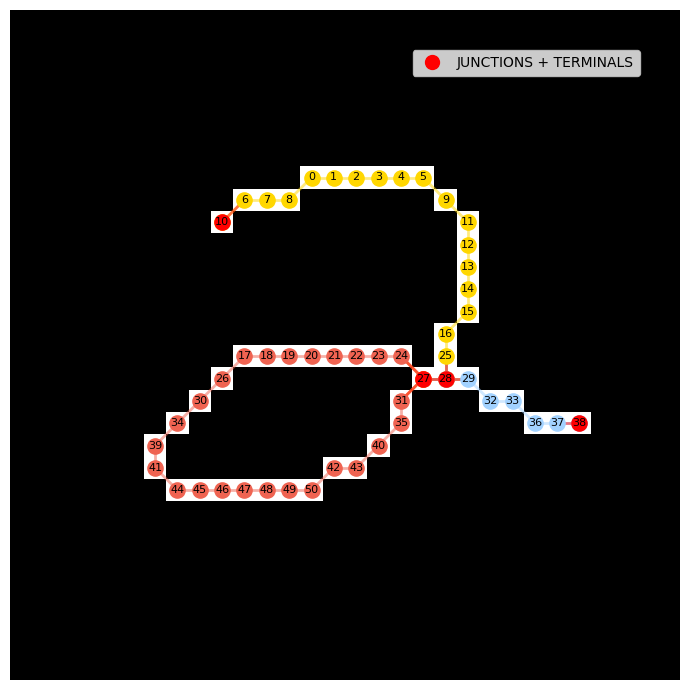

In [32]:
plot_graph_paths(result_dict_2254, node_size=120, label_size=8, show_legend=True)


### Check more output details code snippets below

In [33]:
print (type (result_dict_2254))

<class 'dict'>


In [34]:
print (len (result_dict_2254))

15


In [35]:
# get keys in the results dictionary
print(result_dict_2254.keys()) 

dict_keys(['cliques', 'end_nodes', 'junction_nodes', 'node_types', 'paths_list', 'pathseg_points', 'removed_edges', 'runtime', 'search_by_location', 'search_by_node', 'simple_graph', 'skeleton', 'skeleton_coordinates', 'skeleton_graph', 'subgraphs_list'])


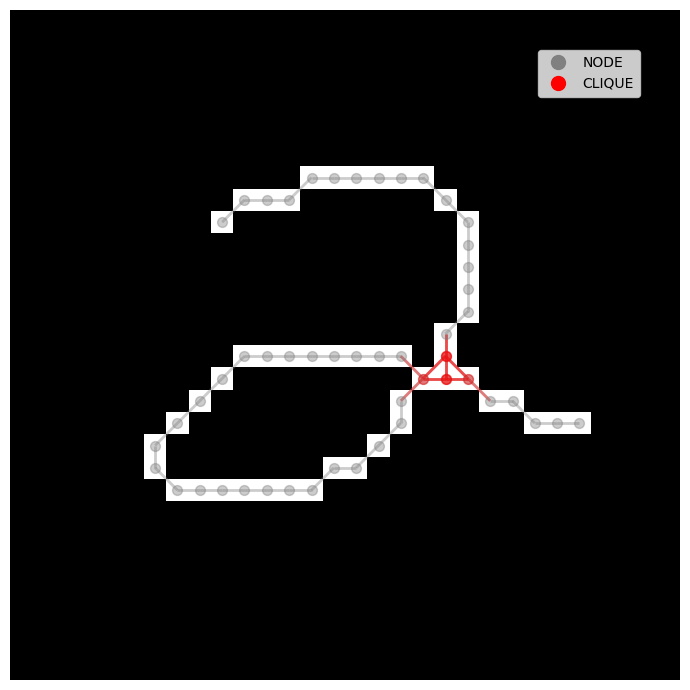

In [36]:
plot_cliques(result_dict_2254, "", node_size=50, node_labels=False, show_legend=True)

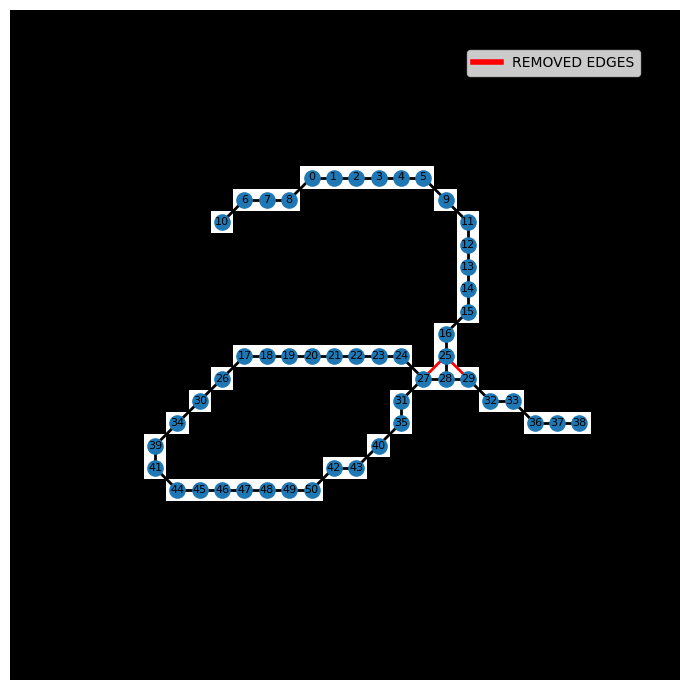

In [37]:
plot_removed_edges(result_dict_2254, node_size=120, label_size=8, show_legend=True)


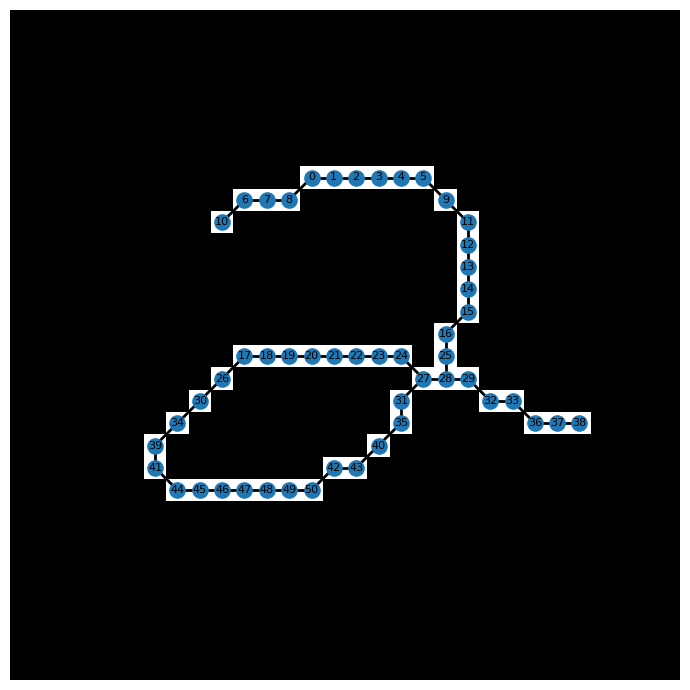

In [38]:
plot_simplified_graph(result_dict_2254, node_size=120, label_size=8)


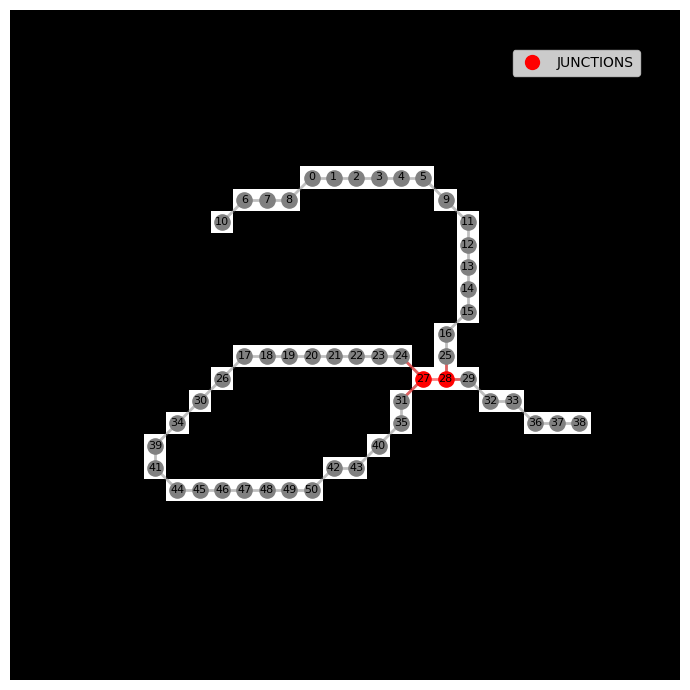

In [39]:
plot_junctions(result_dict_2254, node_size=120, label_size=8, show_legend=True)


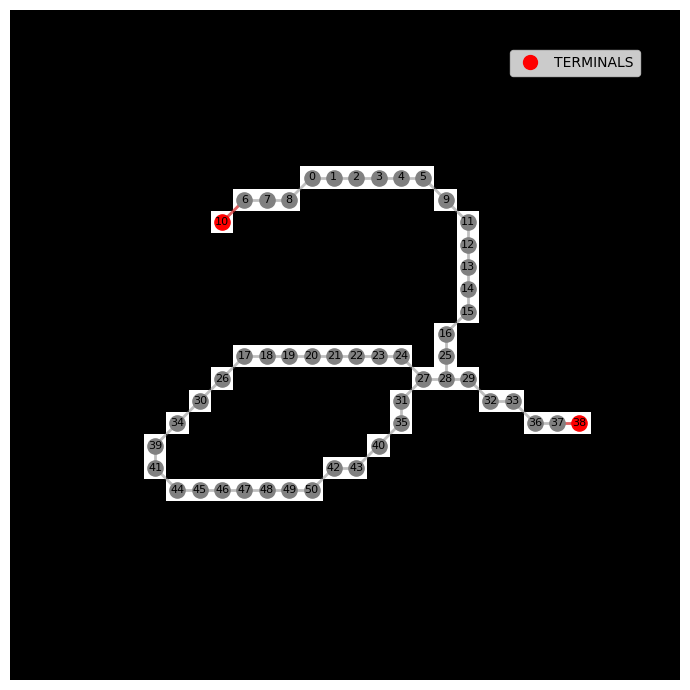

In [40]:
plot_terminals(result_dict_2254, node_size=120, label_size=8, show_legend=True)


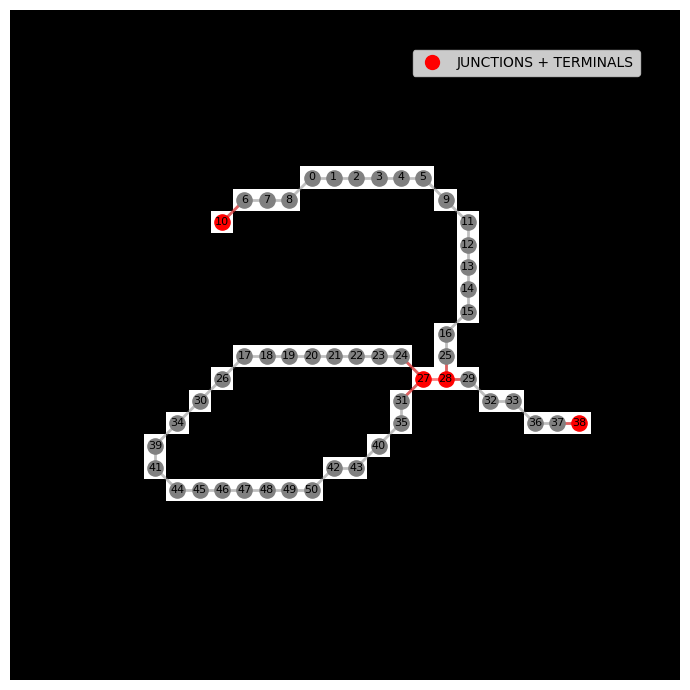

In [41]:
plot_pathseg_points(result_dict_2254, node_size=120, label_size=8, show_legend=True)


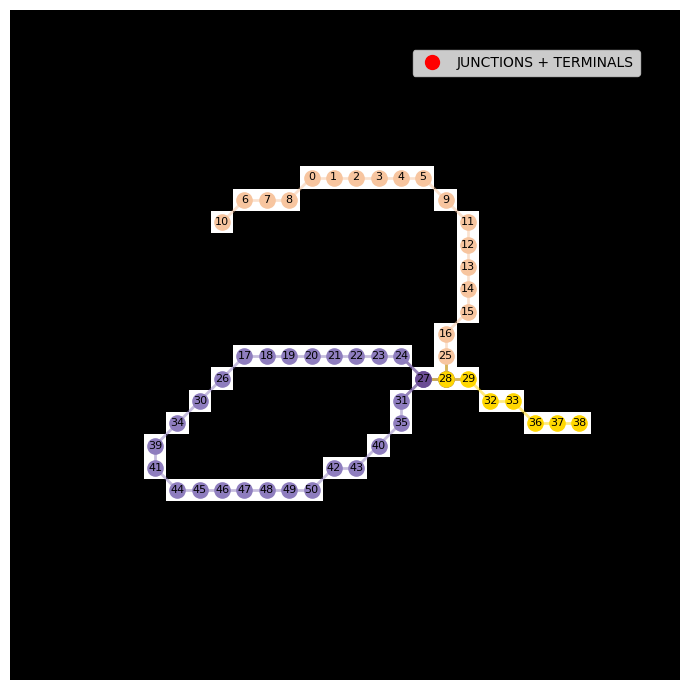

Paths list:
[10, 6, 7, 8, 0, 1, 2, 3, 4, 5, 9, 11, 12, 13, 14, 15, 16, 25, 28]
[27, 24, 23, 22, 21, 20, 19, 18, 17, 26, 30, 34, 39, 41, 44, 45, 46, 47, 48, 49, 50, 42, 43, 40, 35, 31, 27]
[27, 28]
[28, 29, 32, 33, 36, 37, 38]


In [42]:
plot_graph_paths(result_dict_2254, node_size=120, plot_pathseg_points=False, label_size=8, show_legend=True)

print("Paths list:")
for path in result_dict_2254["paths_list"]:
    print(path)

where the path [27, 24, 23, 22, 21, 20, 19, 18, 17, 26, 30, 34, 39, 41, 44, 45, 46, 47, 48, 49, 50, 42, 43, 40, 35, 31, 27] is a self-loop, because it starts and ends with the same node 27.

The path [10, 6, 7, 8, 0, 1, 2, 3, 4, 5, 9, 11, 12, 13, 14, 15, 16, 25, 28] is connected to the path [28, 29, 32, 33, 36, 37, 38] via the junction node with id as 28.

The path [10, 6, 7, 8, 0, 1, 2, 3, 4, 5, 9, 11, 12, 13, 14, 15, 16, 25, 28] is connected to the very short path [27, 28] via the junction node with id as 28.

the self-looped path [27, 24, 23, 22, 21, 20, 19, 18, 17, 26, 30, 34, 39, 41, 44, 45, 46, 47, 48, 49, 50, 42, 43, 40, 35, 31, 27] is get connected to the very short path  [27, 28] via the junction node with id as 27.


We have a very short path  [27, 28] because it starts with one junction node and end with another junction node.

Per the path segmentation algorithm in our TGGLinesPls paper, we segment paths by path segment nodes (junction node, terminal node). So a path can start with a terminal node or junction node and ends with another terminal node or another junction node. We do need to clarify here, the junction node in the final path segmentation, we refer to the primary junction node introduced in our TGGLinesPlus, not the initial junction node (which are the initial junction nodes included in our cliques, see the plot clique output mention in this Jupyter Notebook above).



### Code snippet for saving the output as a pickle (.pkl) file 

In [45]:
import pickle


In [46]:
# Save the dictionary to a file
with open("result_dict_2254.pkl", "wb") as file:
    pickle.dump(result_dict_2254, file)


### Code snippet for loading picked output to avoid running the code every time when we need to do post-analysis of the result


In [47]:
# Unpickling a dictionary


import pickle

# Load the dictionary from the file
with open("result_dict_2254.pkl", "rb") as file:
    loaded_dict = pickle.load(file)

print(loaded_dict)

{'cliques': [[25, 27, 28], [25, 28, 29]], 'end_nodes': [10, 38], 'junction_nodes': [27, 28], 'node_types': ['E', 'E', 'J', 'J', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'], 'paths_list': [[10, 6, 7, 8, 0, 1, 2, 3, 4, 5, 9, 11, 12, 13, 14, 15, 16, 25, 28], [27, 24, 23, 22, 21, 20, 19, 18, 17, 26, 30, 34, 39, 41, 44, 45, 46, 47, 48, 49, 50, 42, 43, 40, 35, 31, 27], [27, 28], [28, 29, 32, 33, 36, 37, 38]], 'pathseg_points': [10, 27, 28, 38], 'removed_edges': [(25, 27), (25, 29)], 'runtime': 0.0038938599991524825, 'search_by_location': {'[np.int64(7), np.int64(13)]': 0, '[np.int64(7), np.int64(14)]': 1, '[np.int64(7), np.int64(15)]': 2, '[np.int64(7), np.int64(16)]': 3, '[np.int64(7), np.int64(17)]': 4, '[np.int64(7), np.int64(18)]': 5, '[np.int64(8), np.int64(10)]': 6, '[np.int64(8), np.int64(11)]': 7

See below for the Figure 3 example output dictionary.

## TGGLinesPlus algorithm illustrration example in the paper (Figure 3): a graph with one loop and two subgraphs

In [48]:
idx_1911 = 1911  # this is the paper TGGLinePlus algorithm illustration image (Figure 3 in the TGGLinesPlus paper)
label_1911 = mnist_labels[idx_1911]
img_1911 = mnist_images[idx_1911]
binary_1911 = mnist_binaries[idx_1911]
skeleton_1911 = mnist_skeletons[idx_1911]


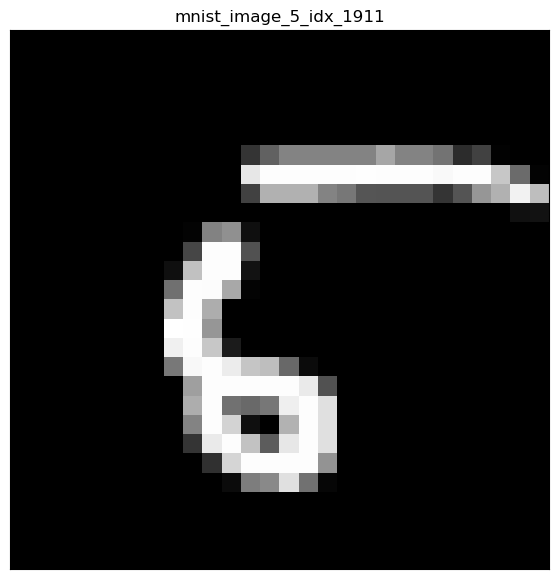

In [49]:
fig, ax = plt.subplots(1, figsize=(7, 7))

ax.imshow(img_1911, cmap="gray")

ax.set_xticks([])
ax.set_yticks([]) 
ax.set_title("mnist_image_{}_idx_{}".format(label_1911, idx_1911))

plt.show()

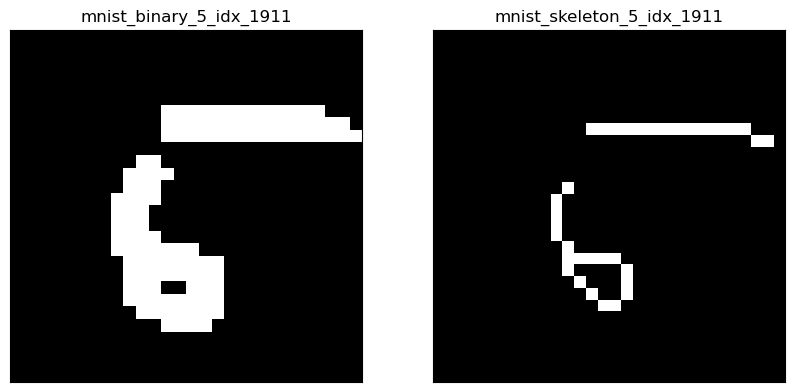

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

ax[0].imshow(binary_1911, cmap="gray")
ax[1].imshow(skeleton_1911, cmap="gray")

for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0].set_title("mnist_binary_{}_idx_{}".format(label_1911, idx_1911))
ax[1].set_title("mnist_skeleton_{}_idx_{}".format(label_1911, idx_1911))

plt.show()


In [51]:
skeleton_array_1911, coordinates_1911 = create_skeleton_graph(skeleton_1911, connectivity=2)
skeleton_graph_1911 = nx.from_scipy_sparse_array(skeleton_array_1911)
search_by_node_1911, search_by_location_1911 = get_node_locations(coordinates_1911)


In [52]:
result_dict_1911 = TGGLinesPlus(skeleton_1911)
stats_dict_1911 = print_stats(result_dict_1911)


Number of junctions:                       1
Number of terminal nodes:                  3
Number of path segmentation points:        4
Number of nodes in graph:                  35
Path seg points as total node percent:     0.114
------------------------------------------
Number of subgraphs in main graph:         2
------------------------------------------
Number of pixels in image:                 900
Skeleton pixels as total image percent:    0.039
------------------------------------------
Time to run:                               0.00394s



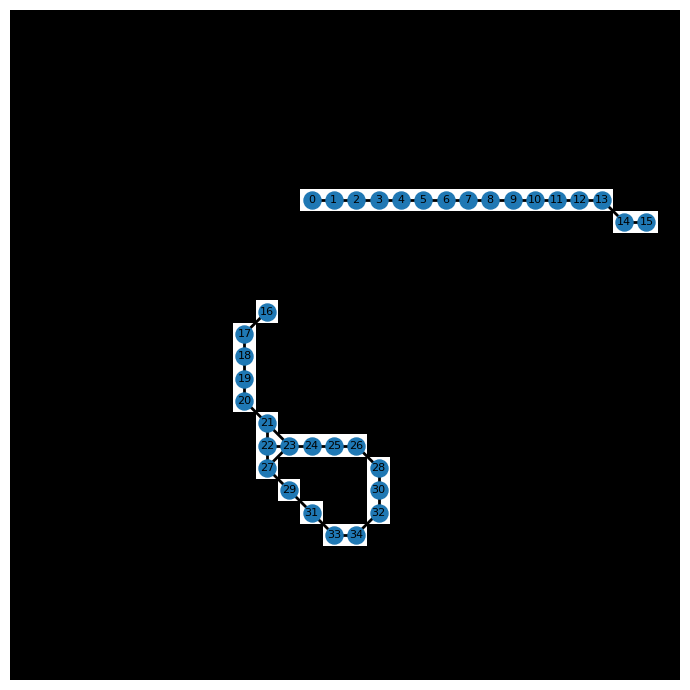

In [53]:
plot_graph(skeleton_1911, skeleton_graph_1911, coordinates_1911, search_by_node_1911, node_size=150, label_size=8)


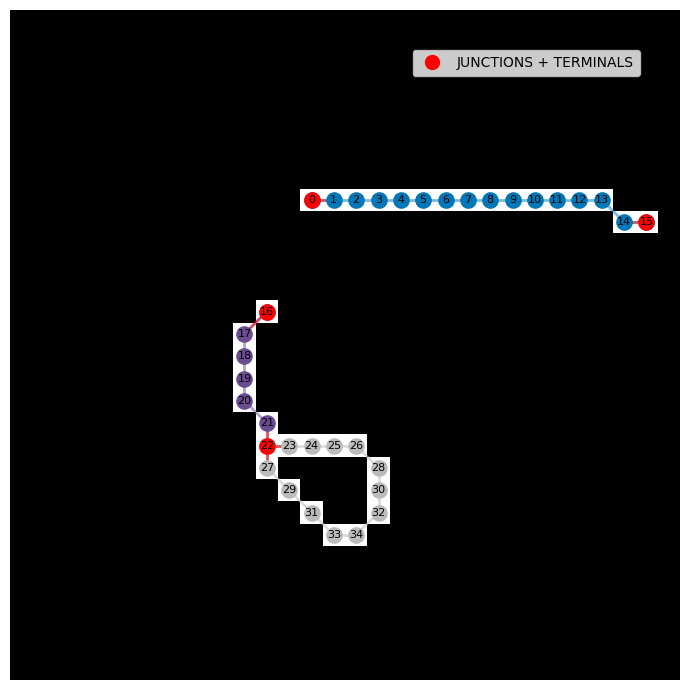

In [54]:
plot_graph_paths(result_dict_1911, node_size=120, label_size=8, show_legend=True)


### Check more output details code snippets below

In [55]:
print (type (result_dict_1911))

<class 'dict'>


In [56]:
print (len (result_dict_1911))

15


In [57]:
# get keys in the results dictionary
print(result_dict_1911.keys()) 

dict_keys(['cliques', 'end_nodes', 'junction_nodes', 'node_types', 'paths_list', 'pathseg_points', 'removed_edges', 'runtime', 'search_by_location', 'search_by_node', 'simple_graph', 'skeleton', 'skeleton_coordinates', 'skeleton_graph', 'subgraphs_list'])


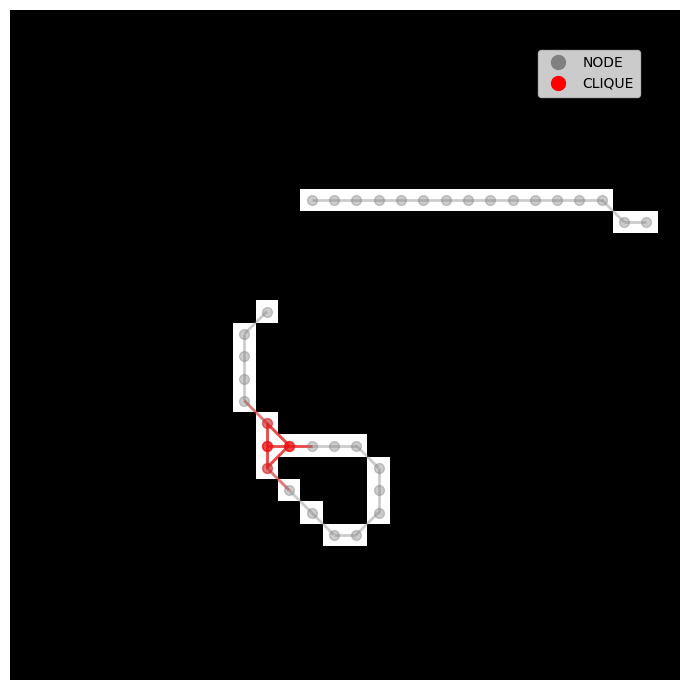

In [58]:
plot_cliques(result_dict_1911, "", node_size=50, node_labels=False, show_legend=True)

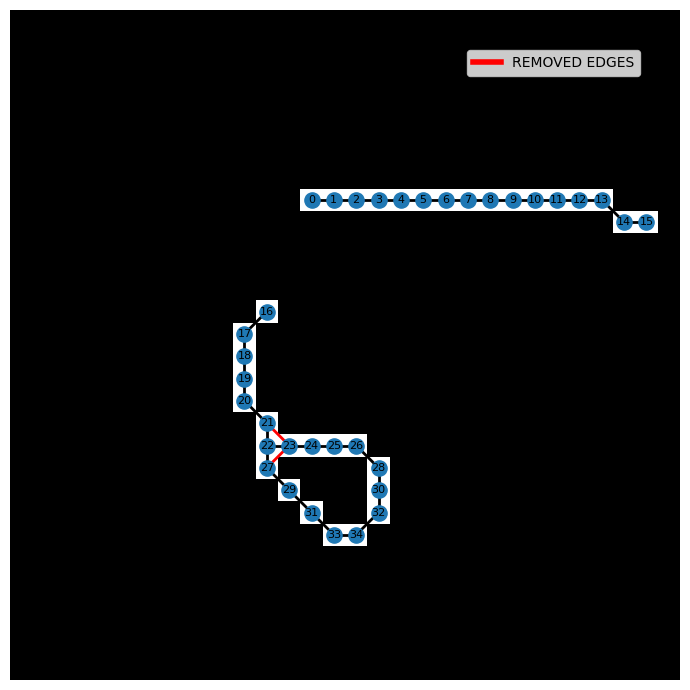

In [59]:
plot_removed_edges(result_dict_1911, node_size=120, label_size=8, show_legend=True)


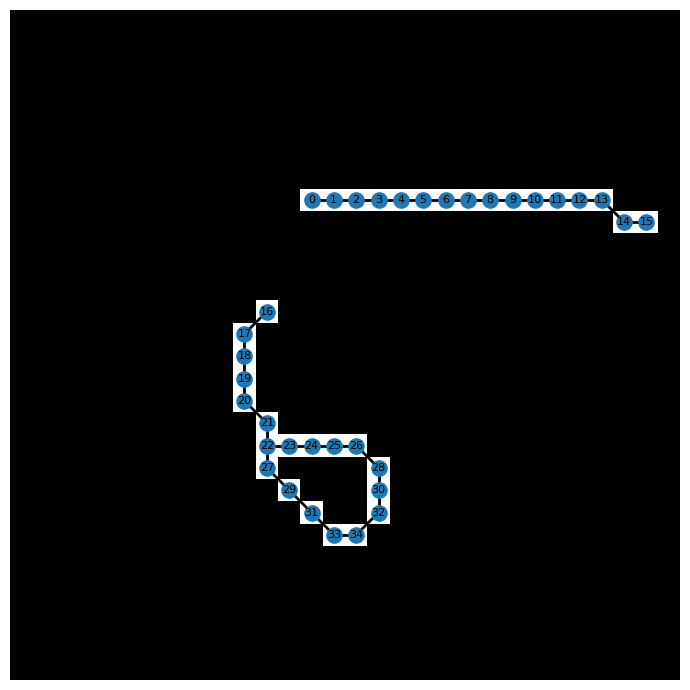

In [60]:
plot_simplified_graph(result_dict_1911, node_size=120, label_size=8)


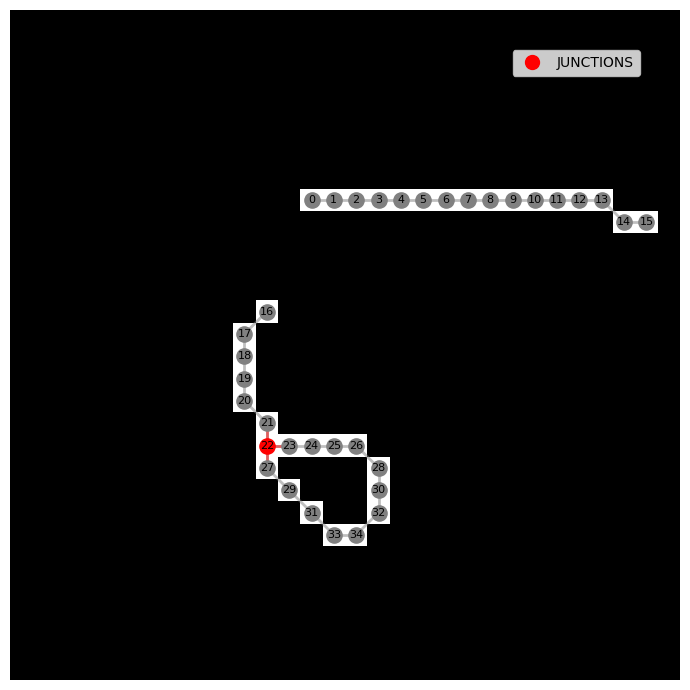

In [61]:
plot_junctions(result_dict_1911, node_size=120, label_size=8, show_legend=True)


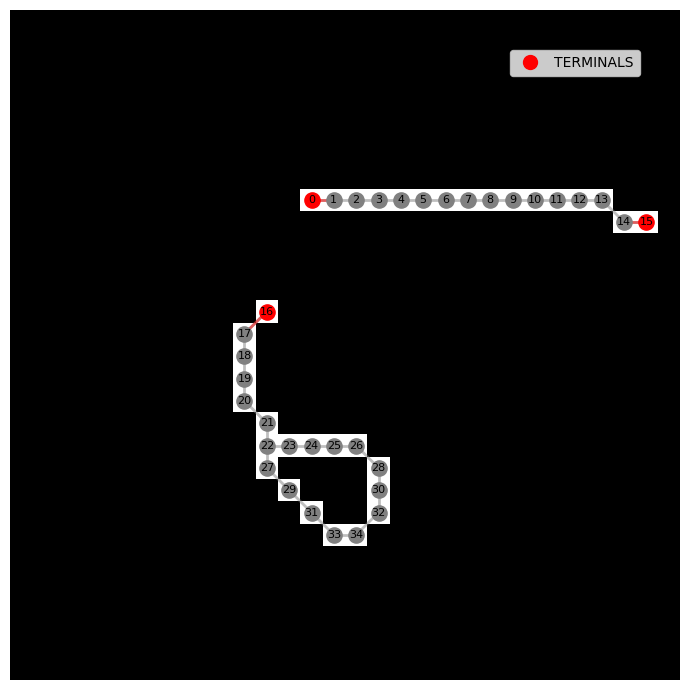

In [62]:
plot_terminals(result_dict_1911, node_size=120, label_size=8, show_legend=True)


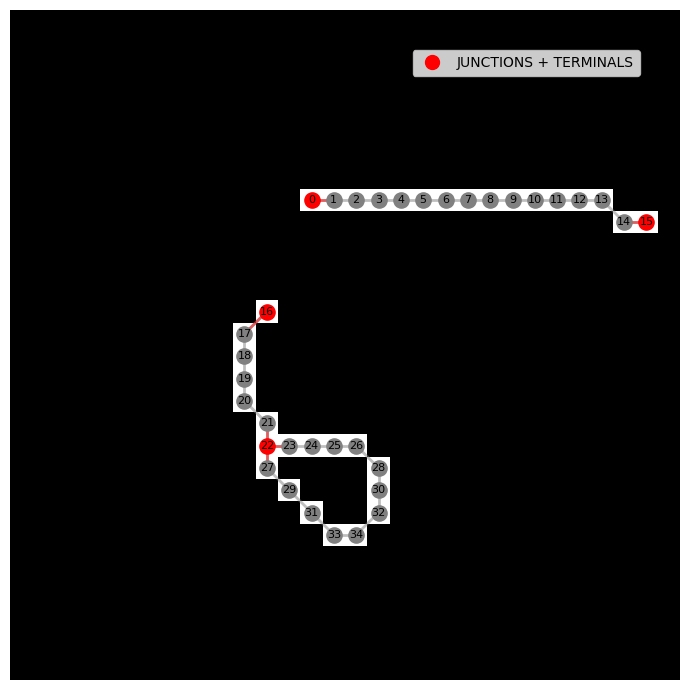

In [63]:
plot_pathseg_points(result_dict_1911, node_size=120, label_size=8, show_legend=True)


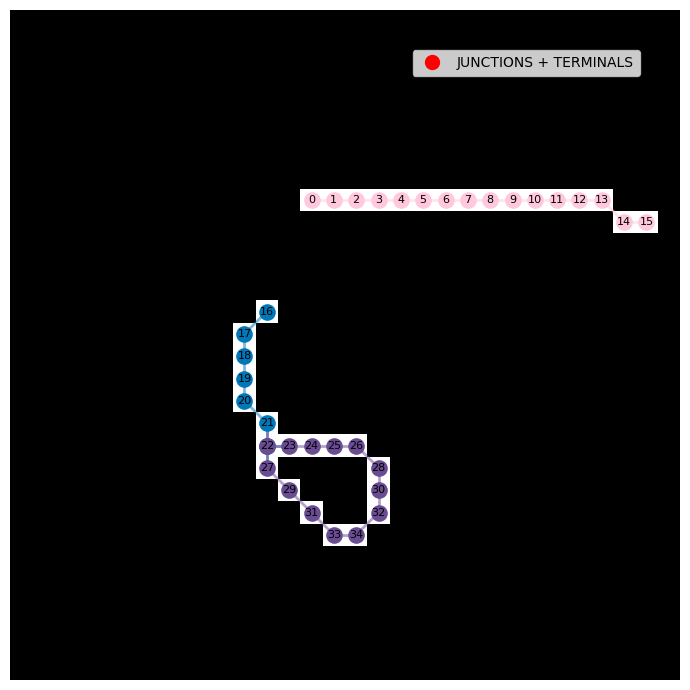

Paths list:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[16, 17, 18, 19, 20, 21, 22]
[22, 27, 29, 31, 33, 34, 32, 30, 28, 26, 25, 24, 23, 22]


In [64]:
plot_graph_paths(result_dict_1911, node_size=120, plot_pathseg_points=False, label_size=8, show_legend=True)

print("Paths list:")
for path in result_dict_1911["paths_list"]:
    print(path)

Where the path [22, 27, 29, 31, 33, 34, 32, 30, 28, 26, 25, 24, 23, 22] is a self-loop, because it starts and ends with the same node with id as 22.

The path [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] is a separate standalone path; that is, it does not get connected with any other two paths. so it has two terminal nodes (or also called end nodes) -- the node with Id 0 and id 15.

The path [16, 17, 18, 19, 20, 21, 22] and the self-loop path [22, 27, 29, 31, 33, 34, 32, 30, 28, 26, 25, 24, 23, 22] are connected by the junction node with id 22.



### Code snippet for saving the output as a pickle (.pkl) file 

In [70]:
import pickle


In [71]:
# Save the dictionary to a file
with open("result_dict_1911.pkl", "wb") as file:
    pickle.dump(result_dict_1911, file)


### Code snippet for loading picked output to avoid running the code every time when we need to do post-analysis of the result


In [72]:
# Unpickling a dictionary


import pickle

# Load the dictionary from the file
with open("result_dict_1911.pkl", "rb") as file:
    loaded_dict = pickle.load(file)

print(loaded_dict)

{'cliques': [[21, 22, 23], [22, 23, 27]], 'end_nodes': [0, 15, 16], 'junction_nodes': [22], 'node_types': ['E', 'E', 'E', 'J', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T'], 'paths_list': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [16, 17, 18, 19, 20, 21, 22], [22, 27, 29, 31, 33, 34, 32, 30, 28, 26, 25, 24, 23, 22]], 'pathseg_points': [0, 15, 16, 22], 'removed_edges': [(21, 23), (23, 27)], 'runtime': 0.003944789999877685, 'search_by_location': {'[np.int64(8), np.int64(13)]': 0, '[np.int64(8), np.int64(14)]': 1, '[np.int64(8), np.int64(15)]': 2, '[np.int64(8), np.int64(16)]': 3, '[np.int64(8), np.int64(17)]': 4, '[np.int64(8), np.int64(18)]': 5, '[np.int64(8), np.int64(19)]': 6, '[np.int64(8), np.int64(20)]': 7, '[np.int64(8), np.int64(21)]': 8, '[np.int64(8), np.int64(22)]': 9, '[np.int64(8), np.int64(23)]': 10, '[np.int64(8), np.int64(24)]': 11, '[np.int64(8), np